# 1. Giới thiệu Project 
**Coronavirus** là một họ vi-rút có thể gây bệnh, có thể khiến *cảm lạnh thông thường* và *ho* trở bệnh nặng hơn. **Hội chứng hô hấp Trung Đông (MERS-CoV)** và **Hội chứng hô hấp cấp tính nặng (SARS-CoV)** là những trường hợp nghiêm trọng mà thế giới phải đối mặt.<br> **SARS-CoV-2 (n-coronavirus)** SARS-CoV-2 (n-coronavirus) là loại virus mới thuộc họ coronavirus, *được phát hiện* lần đầu vào năm 2019, chưa được xác định ở người trước đây.

Nó là một loại vi-rút *truyền nhiễm* bắt đầu từ **Vũ Hán** vào **tháng 12 năm 2019**. Sau này, nó được **WHO** tuyên bố là **đại dịch** do tốc độ lây lan cao trên toàn thế giới. Hiện tại (ngày 10 tháng 6 năm 2020), đại dịch này đã khiến hơn *500 nghìn* người chết trên toàn cầu.<br>

Đại dịch đang lan rộng trên toàn thế giới; điều quan trọng bây giờ là hiểu rõ hơn về sự lây lan này. Notebook này đã nỗ lực phân tích dữ liệu tích lũy của các trường hợp đã xác nhận, trường hợp tử vong và hồi phục theo thời gian.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center> 
    </font>
 <center><font face = "Verdana" size ="4"> Keep strong, world! Stay safe and healthy. </font><center>

<br>

# 2. Download và Cài đặt Prerequisite
**pycountry_convert**: Sử dụng dữ liệu quốc gia lấy từ wikipedia, thư viện này cung cấp các hàm chuyển đổi giữa tên quốc gia ISO, mã quốc gia và tên lục địa.

**folium, seaborn, plotly**: Một số thư viện trực quan hóa trong Python.

Bỏ chú thích và cài đặt một số thư viện nếu bạn chưa cài đặt chúng. Nếu không, hãy tiếp tục.

In [ ]:
!pip install pycountry_convert 
!pip install folium
!pip install seaborn
!pip install plotly

In [1]:
#Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
from pycountry_convert import country_mappings as cm
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# 3. Download tập dữ liệu

Tập dữ liệu này được cập nhật hàng ngày bởi Johns Hopkins CSSE. Tuy nhiên trong Asm này, học viên chỉ cần xử lý từ ngày đầu đến ngày 8/4/2021.

In [2]:
# Dữ liệu toàn cầu

confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [3]:
# Nhận code bạn tại đây để confirmed_df chỉ chưa dữ liệu đến ngày 8/4/2021
confirmed_df = confirmed_df.loc[:,: '4/8/21']

confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,56384,56454,56517,56572,56595,56676,56717,56779,56873,56943
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,124723,125157,125506,125842,126183,126531,126795,126936,127192,127509
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,117061,117192,117304,117429,117524,117622,117739,117879,118004,118116
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,11944,12010,12053,12115,12174,12231,12286,12328,12363,12409
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,22182,22311,22399,22467,22579,22631,22717,22885,23010,23108


In [4]:
# Nhận code bạn tại đây để deaths_df chỉ chưa dữ liệu đến ngày 8/4/2021
deaths_df = deaths_df.loc[:,: '4/8/21']

deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2476,2484,2489,2495,2496,2497,2508,2512,2512,2516
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2227,2235,2241,2247,2256,2265,2274,2283,2291,2297
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3089,3093,3096,3099,3102,3105,3108,3112,3116,3119
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,115,115,115,116,117,117,117,117,119,120
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,536,537,538,538,540,542,543,547,547,549


In [5]:
# Nhận code bạn tại đây để recoveries_df chỉ chưa dữ liệu đến ngày 8/4/2021
recoveries_df = recoveries_df.loc[:,: '4/8/21']

recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,51473,51550,51788,51798,51802,51885,51902,51928,51940,51956
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,90617,91271,91875,92500,93173,93842,94431,95035,95600,96129
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,81442,81538,81632,81729,81813,81896,81994,82096,82192,82289
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,11276,11315,11365,11401,11428,11474,11523,11570,11616,11692
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,20446,20493,20508,20867,20871,20879,21452,21489,21545,21557


#  4. Tìm hiểu dữ liệu 


    Xác định ngày đầu tiên bộ dữ liệu bắt đầu lưu trữ số ca Covid của 3 bộ dữ liệu

In [26]:
# Nhập code ở đây:
confirmed_date = confirmed_df.transpose()
deaths_date = deaths_df.transpose()
recoveries_date = recoveries_df.transpose()

tpl_3_df_firstday = confirmed_date.index[4], deaths_date.index[4], recoveries_date.index[4]
print(tpl_3_df)

('1/22/20', '1/22/20', '1/22/20')


    Xác định ngày cuối cùng dữ liệu được cập nhật số ca Covid của 3 DataFrames

In [30]:
# Nhập code ở đây:
tpl_3_df_lastday = confirmed_df.columns[-1], deaths_df.columns[-1], recoveries_df.columns[-1]
print(tpl_3_df_lastday)

('4/8/21', '4/8/21', '4/8/21')


    Xác định có bao nhiêu quốc gia trong dữ liệu này

In [56]:
# Nhập code ở đây:
value_countries_confirmed = confirmed_df['Country/Region'].unique().size
value_countries_deaths = deaths_df['Country/Region'].unique().size
value_countries_recoveries = recoveries_df['Country/Region'].unique().size
value_countries_3df = value_countries_confirmed, value_countries_deaths, value_countries_recoveries
value_countries_3df

(201, 201, 201)

    Tính tổng số ngày có trong 3 bộ dữ liệu
  



In [60]:
# Nhập code ở đây:
value_date_confirmed = confirmed_df.columns[4:].size
value_date_deaths = deaths_df.columns[4:].size
value_date_recoveries = recoveries_df.columns[4:].size
value_date_3df = value_date_confirmed, value_date_deaths, value_date_recoveries
value_date_3df

(443, 443, 443)

    Quan sát xem có quốc gia nào bị trùng lặp trong 3 bộ dữ liệu hay không

In [63]:
# Nhập code ở đây (confirmed_df):
df_confirmed_duplicated = confirmed_df.duplicated(subset = ['Country/Region'])
confirmed_df[df_confirmed_duplicated]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21
10,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,5291,5296,5296,5299,5300,5303,5310,5316,5318,5320
11,Northern Territory,Australia,-12.463400,130.845600,0,0,0,0,0,0,...,108,108,109,111,112,112,112,112,112,112
12,Queensland,Australia,-27.469800,153.025100,0,0,0,0,0,0,...,1467,1477,1485,1488,1489,1492,1491,1497,1500,1501
13,South Australia,Australia,-34.928500,138.600700,0,0,0,0,0,0,...,655,656,658,658,659,661,661,662,663,665
14,Tasmania,Australia,-42.882100,147.327200,0,0,0,0,0,0,...,234,234,234,234,234,234,234,234,234,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,Montserrat,United Kingdom,16.742498,-62.187366,0,0,0,0,0,0,...,20,20,20,20,20,20,20,20,20,20
275,Pitcairn Islands,United Kingdom,-24.376800,-128.324200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
276,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,-7.946700,-14.355900,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
277,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,0,0,0,0,0,0,...,2329,2329,2337,2344,2344,2344,2344,2344,2344,2344


In [65]:
# Nhập code ở đây (deaths_df):
df_deaths_duplicated = deaths_df.duplicated(subset = ['Country/Region'])
deaths_df[df_deaths_duplicated]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21
10,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,0,0,...,54,54,54,54,54,54,54,54,54,54
11,Northern Territory,Australia,-12.463400,130.845600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,Queensland,Australia,-27.469800,153.025100,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
13,South Australia,Australia,-34.928500,138.600700,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
14,Tasmania,Australia,-42.882100,147.327200,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,Montserrat,United Kingdom,16.742498,-62.187366,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
275,Pitcairn Islands,United Kingdom,-24.376800,-128.324200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
276,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,-7.946700,-14.355900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,0,0,0,0,0,0,...,17,17,17,17,17,17,17,17,17,17


In [66]:
# Nhập code ở đây (recoveries_df):
df_recoveries_duplicated = recoveries_df.duplicated(subset = ['Country/Region'])
recoveries_df[df_recoveries_duplicated]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21
10,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,Northern Territory,Australia,-12.463400,130.845600,0,0,0,0,0,0,...,106,106,106,106,106,106,106,106,106,107
12,Queensland,Australia,-27.469800,153.025100,0,0,0,0,0,0,...,1343,1343,1344,1353,1353,1353,1366,1366,1366,1376
13,South Australia,Australia,-34.928500,138.600700,0,0,0,0,0,0,...,633,640,641,641,642,644,649,649,651,651
14,Tasmania,Australia,-42.882100,147.327200,0,0,0,0,0,0,...,221,221,221,221,221,221,221,221,221,221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Montserrat,United Kingdom,16.742498,-62.187366,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,19
260,Pitcairn Islands,United Kingdom,-24.376800,-128.324200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,-7.946700,-14.355900,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
262,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,0,0,0,0,0,0,...,2212,2268,2268,2271,2271,2271,2271,2271,2276,2276


    Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo toàn quốc chứ không theo từng thành phố


In [67]:
# Nhập code ở đây (recoveries_df):
value_countries = confirmed_df['Country/Region'].unique()
value_countries

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

    Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo từng thành phố

In [69]:
# Nhập code ở đây (recoveries_df):
df_city_countries = confirmed_df[df_confirmed_duplicated]
df_city_countries['Country/Region'].unique()

array(['Australia', 'Canada', 'China', 'Denmark', 'France', 'Netherlands',
       'New Zealand', 'United Kingdom'], dtype=object)

    Xác định quốc gia và ngày mà có số ca Covid nhiều nhất

In [11]:
# Nhập code ở đây:
confirmed_country = confirmed_df.groupby(['Country/Region']).sum()
max_value_of_covid = round(confirmed_country.max().max(), )
max_of_covid_date = confirmed_country.max().idxmax()
max_of_covid_country = confirmed_country.max(axis = 1).idxmax()
print(str(max_of_covid_country) , '-' , str(max_of_covid_date) , ":"  ,str(max_value_of_covid))


US - 4/8/21 : 31122720


    Xác định quốc gia có tổng số người mất do Covid là nhiều nhất

In [102]:
# Nhập code ở đây:
deaths_country = deaths_df.groupby(['Country/Region']).sum()
max_value_of_death = round(deaths_country.max().max())
max_of_death_country = deaths_country.max(axis = 1).idxmax()
print(str(max_of_death_country) , ":"  ,str(max_value_of_death))

US : 556352


    Tính tổng số ca Covid, số ca tử vong, cố ca hồi phục và số ca còn Covid ở thời điểm hiện tại của Việt Nam


In [134]:
# Nhập code ở đây:
value_covid_vietnam = confirmed_df['Country/Region'] == 'Vietnam'
value_death_covid_vietnam = deaths_df['Country/Region'] == 'Vietnam'
value_recoveries_covid_vietnam = recoveries_df['Country/Region'] == 'Vietnam'
value_remaining = confirmed_df[value_covid_vietnam].iloc[0]['4/8/21'] - deaths_df[value_death_covid_vietnam].iloc[0]['4/8/21'] - recoveries_df[value_recoveries_covid_vietnam].iloc[0]['4/8/21']
print('Tổng số ca Covit:', confirmed_df[value_covid_vietnam].iloc[0]['4/8/21'])
print('Tổng số ca tử vong:', deaths_df[value_death_covid_vietnam].iloc[0]['4/8/21'])
print('Tổng số ca phục hồi:', recoveries_df[value_recoveries_covid_vietnam].iloc[0]['4/8/21'])
print('Tổng số ca còn Covit:', value_remaining)


Tổng số ca Covit: 2668
Tổng số ca tử vong: 35
Tổng số ca phục hồi: 2429
Tổng số ca còn Covit: 204


#  5. Phân tích toàn cầu

## Bài toán 1

    Tính số lượng tổng số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và số ca còn đang mắc Covid theo thời gian (đơn vị ngày).

In [24]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

#Nhập code ở đây:
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    total_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)



In [14]:
# Tống số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và số ca còn mắc Covid cho tới giờ.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  134412292
Total death cases:  3024575
Total recoveries cases:  76094849
Total active cases:  55292868


## Bài toán 2

    Hiển thị số lượng và log(10) của tổng số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc covid theo thời gian (đơn vị ngày) trong 2 biểu đồ (một cho số lượng và một cho log(10)) bằng cách sử dụng biểu đồ đường.

Text(0, 0.5, '# of Case')

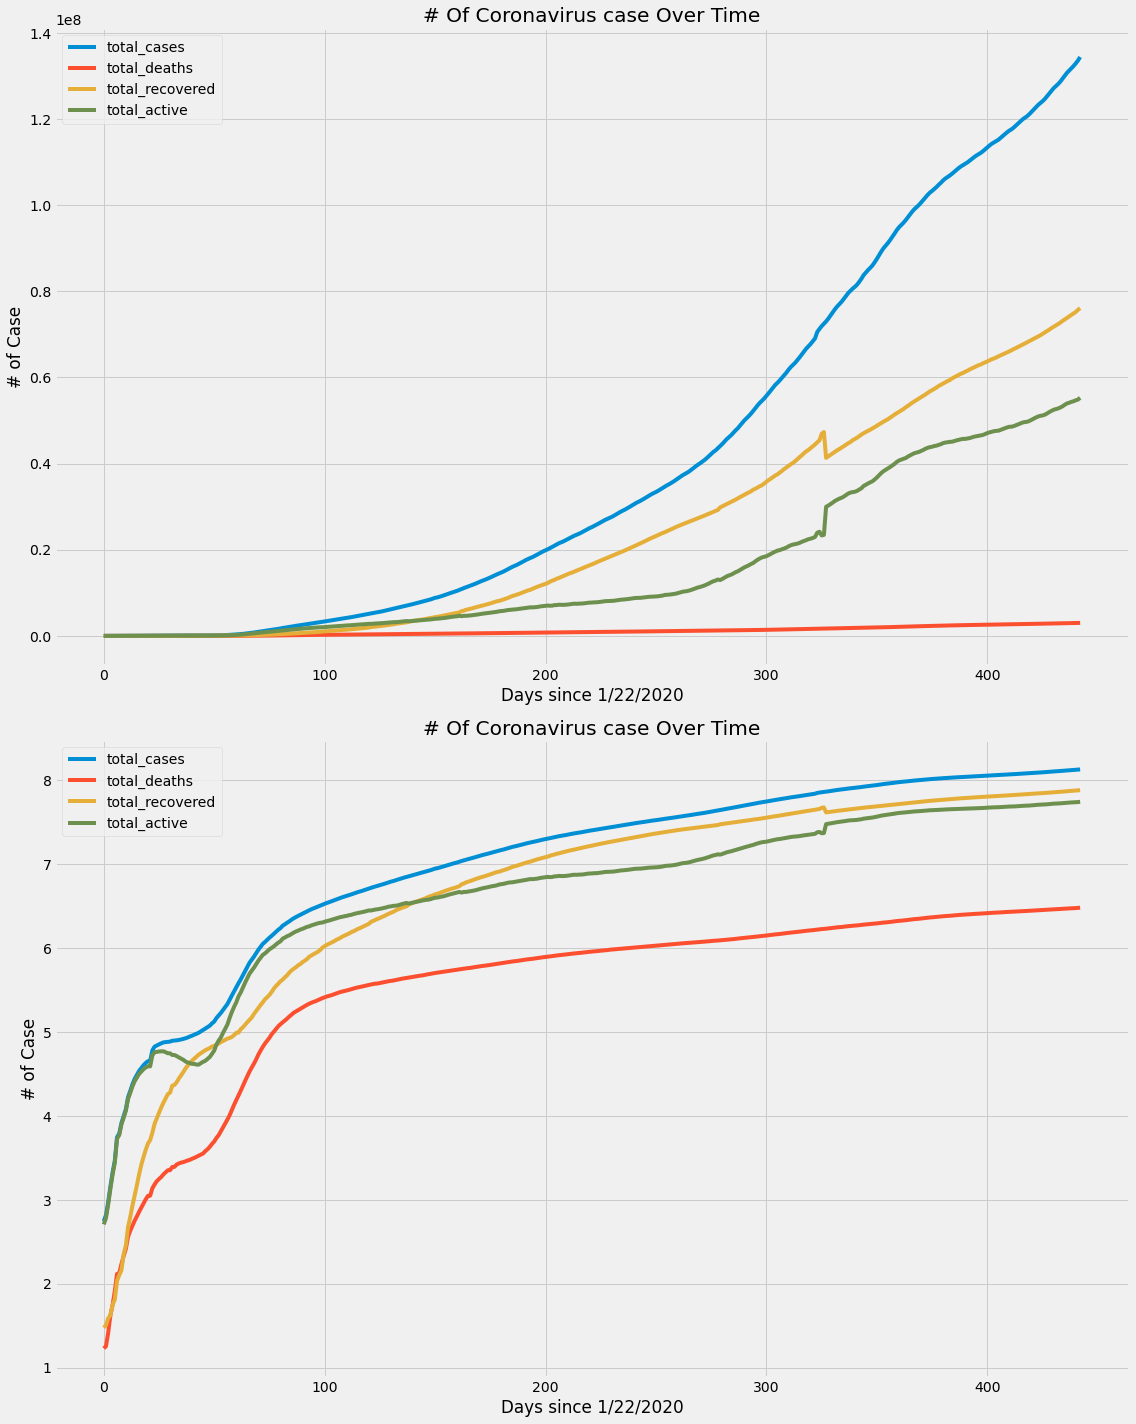

In [65]:
#Nhập code ở đây:

fig, (ax0, ax1) = plt.subplots(2)

covid_df = pd.DataFrame(
    {'total_cases': total_cases,
     'total_deaths'   : total_deaths,
     'total_recovered': total_recovered,
     'total_active'   : total_active
    })
covid_df.plot(figsize=(16, 20), linewidth=4, ax=ax0)
ax0.set_title('# Of Coronavirus case Over Time')
ax0.set_xlabel('Days since 1/22/2020')
ax0.set_ylabel('# of Case')

covid_df_log10 = (covid_df.apply(np.log10))
covid_df_log10.plot(figsize=(16, 20), linewidth=4, ax=ax1)
ax1.set_title('# Of Coronavirus case Over Time')
ax1.set_xlabel('Days since 1/22/2020')
ax1.set_ylabel('# of Case')


## Bài toán 3
    Hiển thị tổng số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc covid theo thời gian (đơn vị ngày) ở 4 biểu đồ riêng biệt bằng cách sử dụng biểu đồ đường.

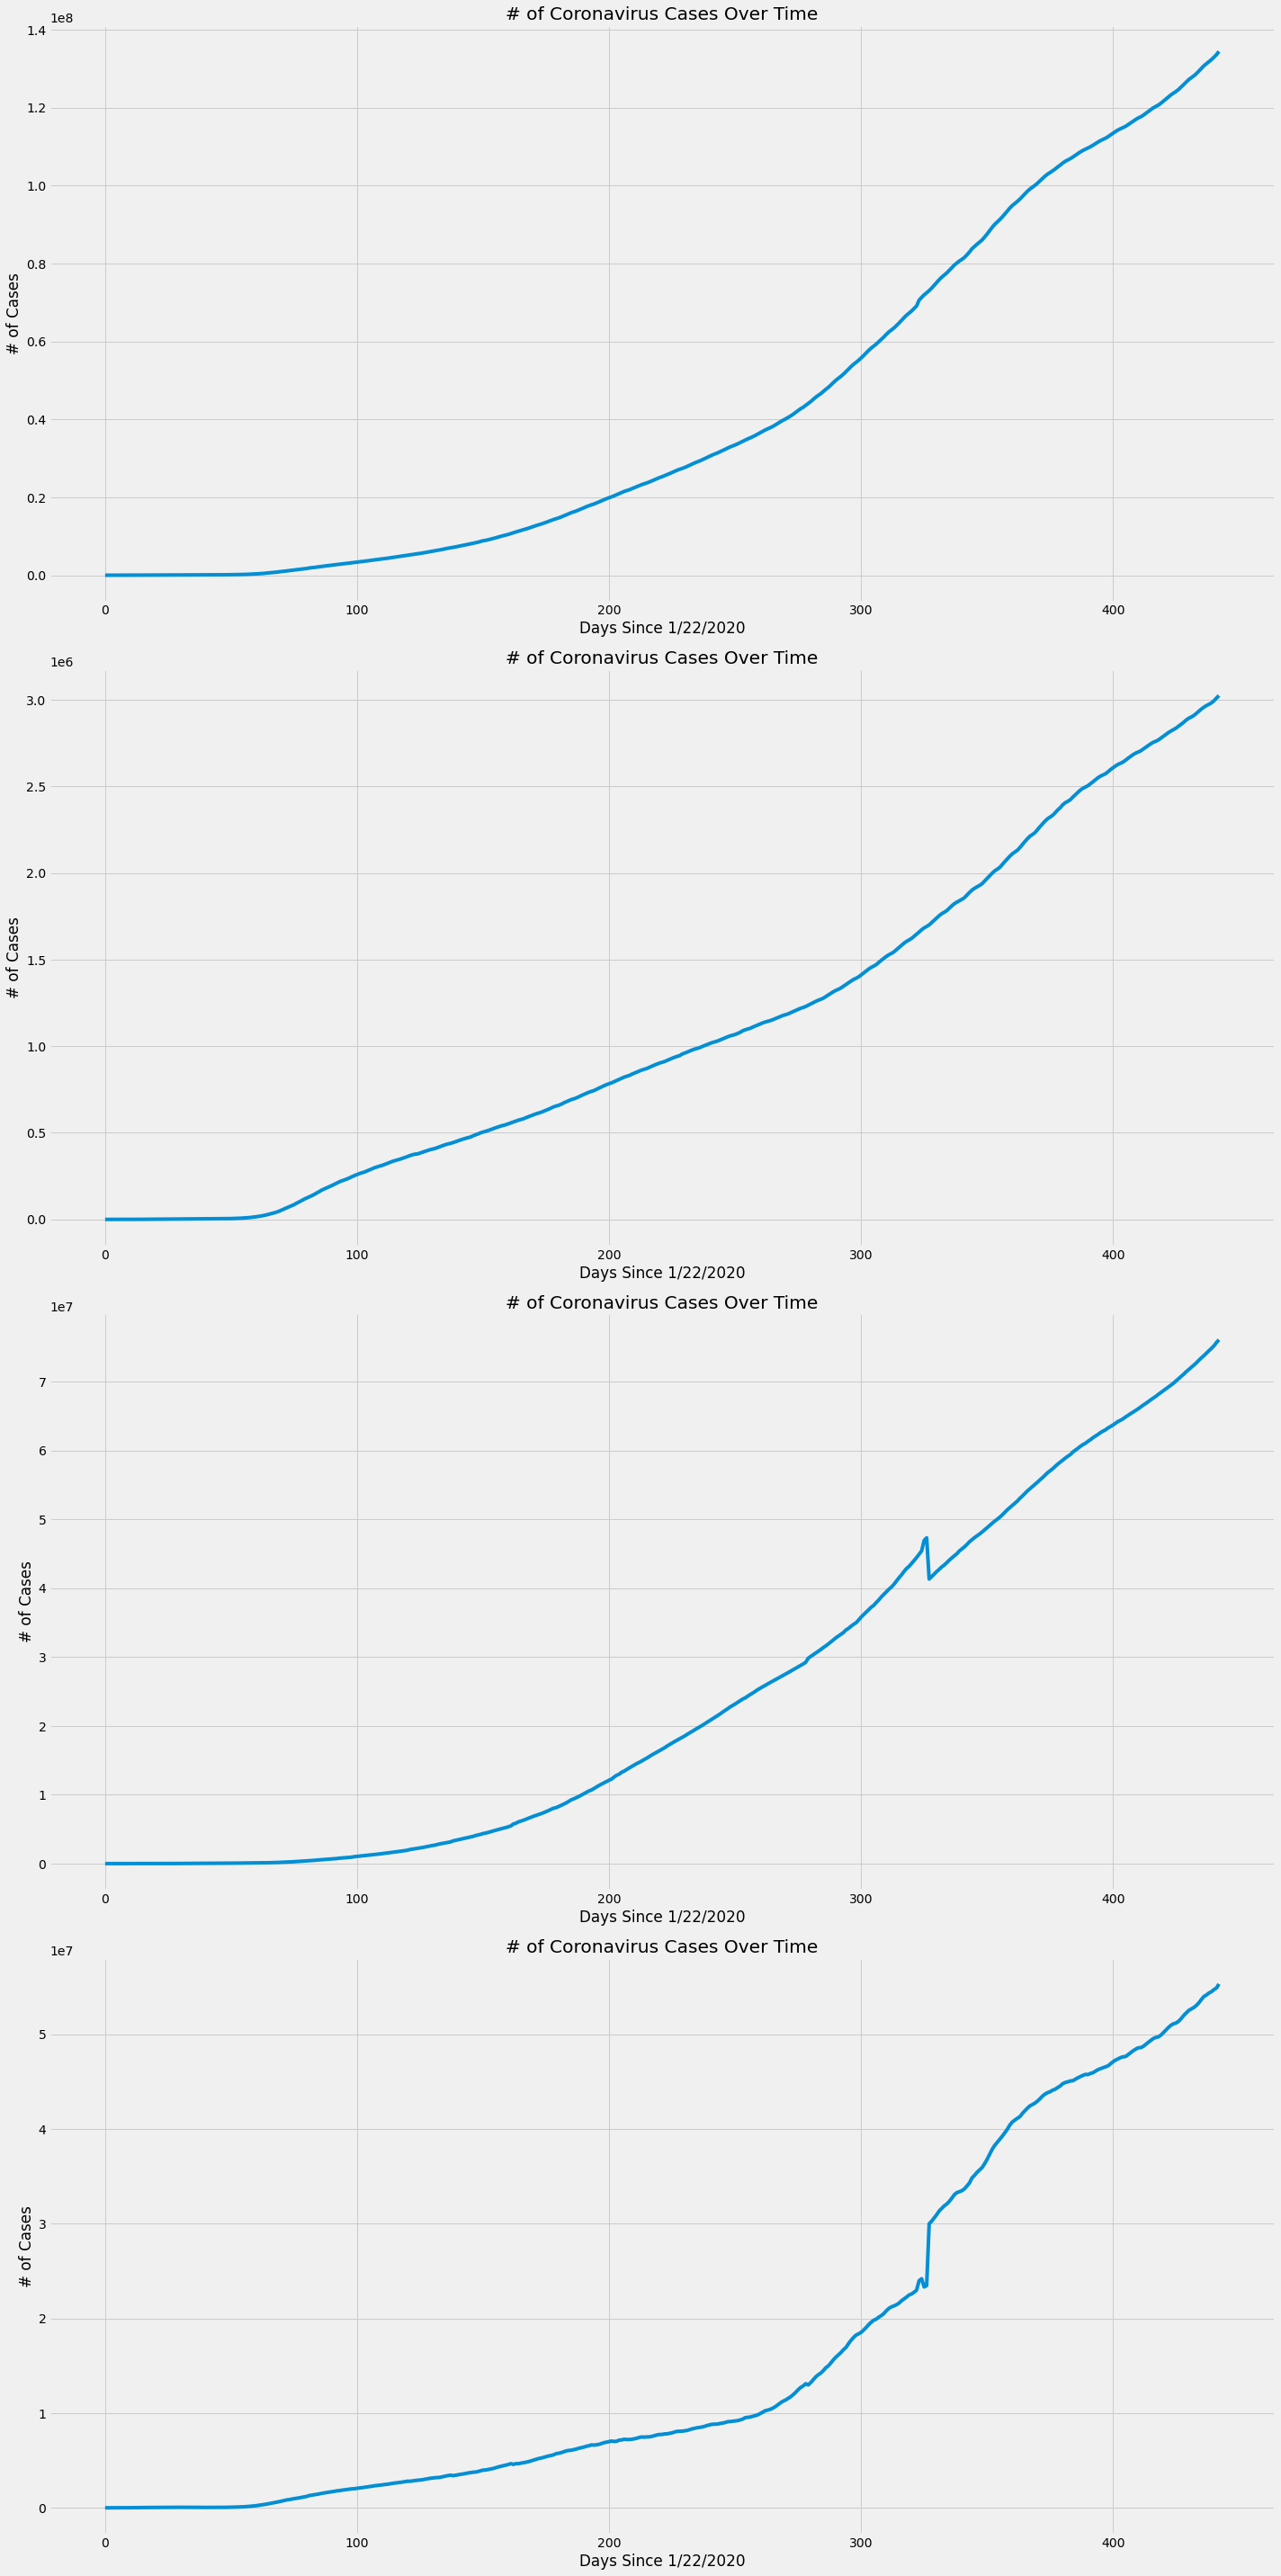

In [71]:
#Nhập code ở đây:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, figsize = (20, 40))

#Biểu đồ tổng số trường hợp covid
ax0.plot(adjusted_dates, total_cases)
ax0.set_title('# of Coronavirus Cases Over Time')
ax0.set_xlabel('Days Since 1/22/2020')
ax0.set_ylabel('# of Cases')

#Biểu đồ tổng số ca tử vong
ax1.plot(adjusted_dates, total_deaths)
ax1.set_title('# of Coronavirus Cases Over Time')
ax1.set_xlabel('Days Since 1/22/2020')
ax1.set_ylabel('# of Cases')

#Biểu đồ tổng số ca hồi phục
ax2.plot(adjusted_dates, total_recovered)
ax2.set_title('# of Coronavirus Cases Over Time')
ax2.set_xlabel('Days Since 1/22/2020')
ax2.set_ylabel('# of Cases')

#Biểu đồ tổng số ca còn mắc
ax3.plot(adjusted_dates, total_active)
ax3.set_title('# of Coronavirus Cases Over Time')
ax3.set_xlabel('Days Since 1/22/2020')
ax3.set_ylabel('# of Cases')

plt.show()

## Bài toán 4
    Tính số lượng gia tăng hàng ngày về: tổng số ca mắc Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc Covid theo thời gian (đơn vị ngày).

In [22]:
#Nhập code ở đây:
def daily_increase(case):
    lst = []
    for i in range(len(case)):
        if i == 0:
            lst.append(case[0])
        else:
            lst.append(case[i] - case[i -1])
    return lst
            
total_daily_increase = daily_increase(total_cases)
total_daily_death = daily_increase(total_deaths)
total_daily_recovery = daily_increase(total_recovered)
total_daily_active = daily_increase(total_active)


## Bài toán 5
    Tính số lượng gia tăng hàng ngày về: tổng số ca mắc Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc Covid theo thời gian (đơn vị ngày ở 4 biểu đồ riêng biệt).

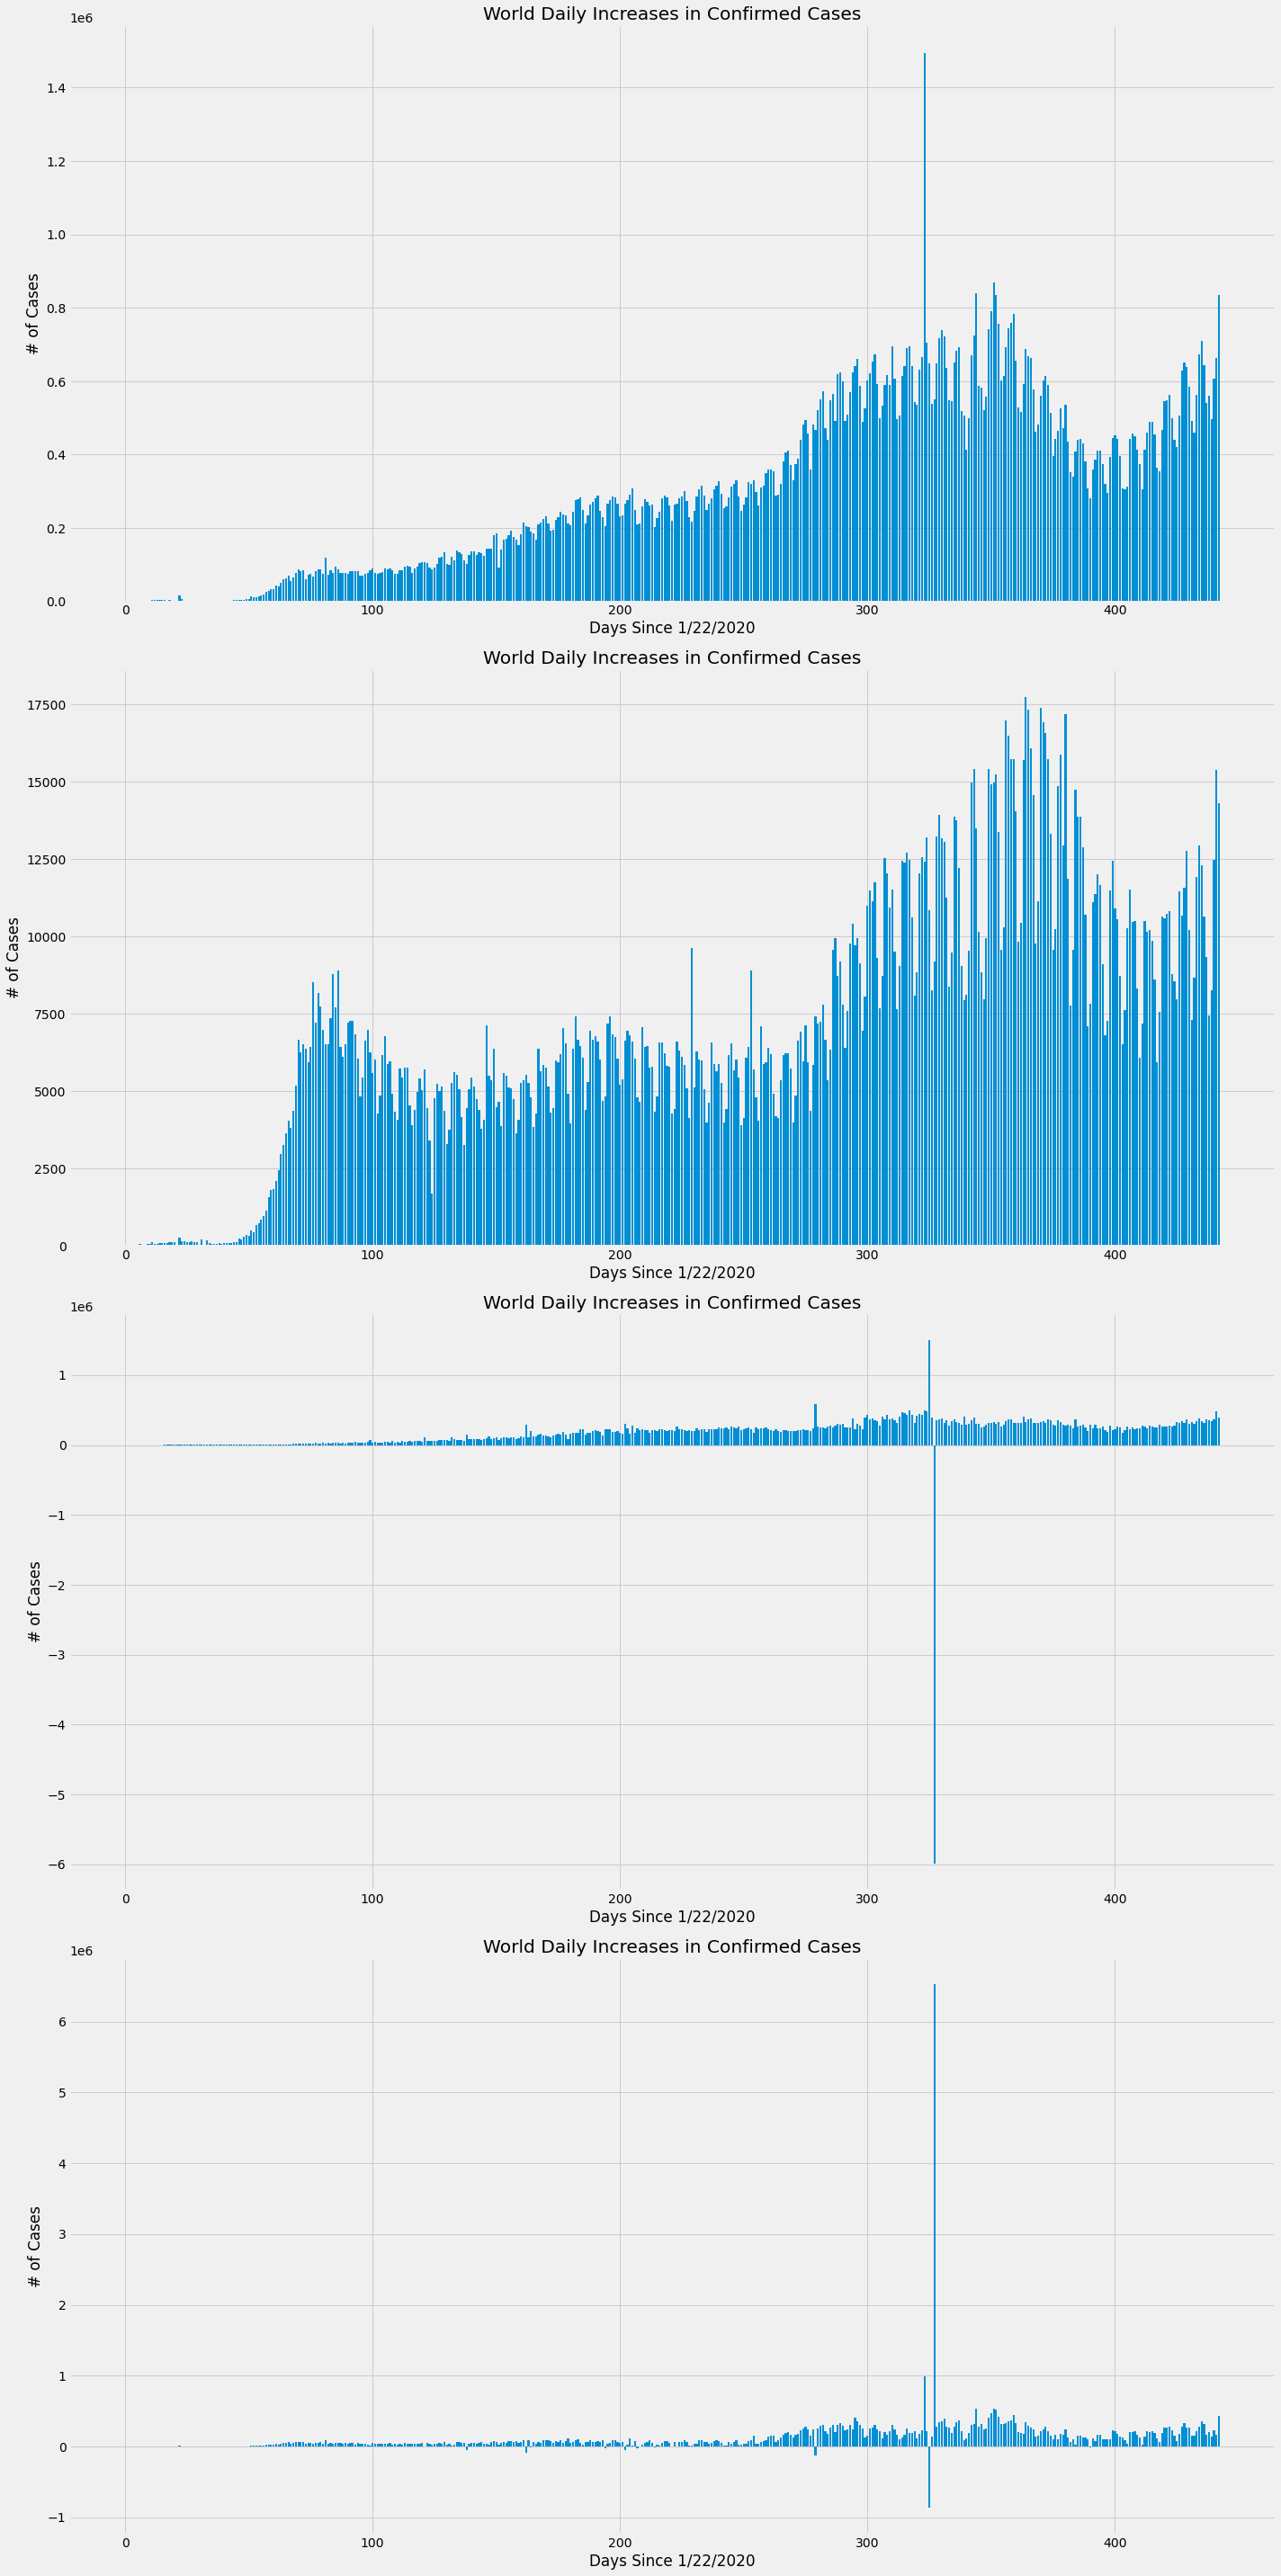

In [76]:
#Nhập code ở đây:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, figsize = (20, 40))

#Biểu đồ bar tổng số ca mắc covid theo thời gian
ax0.bar(adjusted_dates, total_daily_increase)
ax0.set_title('World Daily Increases in Confirmed Cases')
ax0.set_xlabel('Days Since 1/22/2020')
ax0.set_ylabel('# of Cases')

#Biểu đồ bar tổng số ca chết theo thời gian
ax1.bar(adjusted_dates, total_daily_death)
ax1.set_title('World Daily Increases in Confirmed Cases')
ax1.set_xlabel('Days Since 1/22/2020')
ax1.set_ylabel('# of Cases')

#Biểu đồ bar tổng số ca hồi phục theo thời gian
ax2.bar(adjusted_dates, total_daily_recovery)
ax2.set_title('World Daily Increases in Confirmed Cases')
ax2.set_xlabel('Days Since 1/22/2020')
ax2.set_ylabel('# of Cases')

#Biểu đồ bar tổng số ca còn mắc theo thời gian
ax3.bar(adjusted_dates, total_daily_active)
ax3.set_title('World Daily Increases in Confirmed Cases')
ax3.set_xlabel('Days Since 1/22/2020')
ax3.set_ylabel('# of Cases')

plt.show()

## Bài toán 6
    Tính phần trăm tỷ lệ tử vong toàn cầu và tỷ lệ hồi phục theo thời gian.

In [27]:
#Nhập code ở đây:
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    mortality_rate  = (np.array(total_deaths)*100/np.array(total_cases)).tolist()
    recovery_rate   = (np.array(total_recovered)*100/np.array(total_cases)).tolist()
    

## Bài toán 7
**7.1** 

    Hiển thị tỷ lệ tử vong theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để hiển thị tỷ lệ tử vong trung bình theo thời gian.

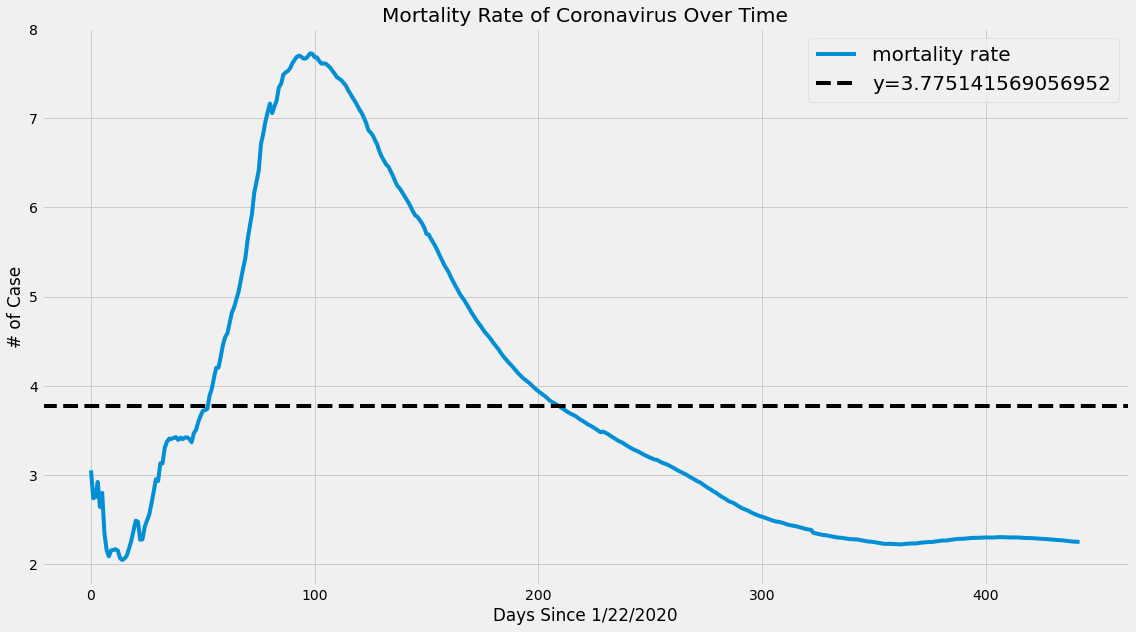

In [103]:
#Nhập code ở đây:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(16, 9))
plt.plot(mortality_rate, linewidth=4)
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time')
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Case')
plt.show()

**7.2** 

    Hiển thị tỷ lệ hồi phục theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để hiển thị tỷ lệ tử vong trung bình theo thời gian.

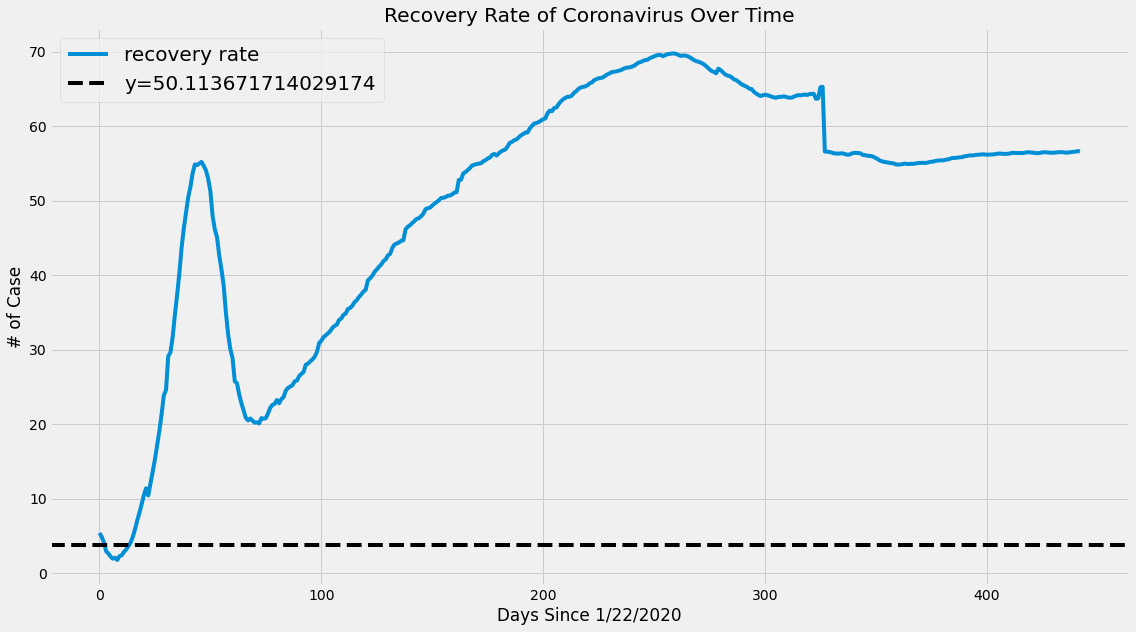

In [104]:
#Nhập code ở đây:
mean_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(16, 9))
plt.plot(recovery_rate, linewidth=4)
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Recovery Rate of Coronavirus Over Time')
plt.legend(['recovery rate', 'y='+str(mean_recovery_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Case')
plt.show()

#  6. Phân tích theo châu lục

## Tiền xử lý dữ liệu

In [40]:
# Thay đổi tên quốc gia theo yêu cầu của pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# nhận tất cả các quốc gia
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code thành Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Định nghĩa hàm để nhận continent code cho quốc gia.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'



## Bài toán 8
    Thêm trường "continent" vào tập dữ liệu confirm_df, death_df và recorveries_df:

In [46]:
#Nhập code ở đây:
continents_confirm = []
continents_deaths = []
continents_recorveries = []


# thêm trường continent vào trong confirm_df
for i in range(countries.shape[0]):
    confirmed_country_code = country_to_continent_code(countries[i])
    continents_confirm.append(continents[confirmed_country_code])
continents_confirm_df = pd.DataFrame(continents_confirm,columns=['continent'])
new_confirmed_df = pd.concat([confirmed_df, continents_confirm_df], axis=1)

# thêm trường continent vào trong deaths_df
for i in range(countries1.shape[0]):  
    deaths_country_code = country_to_continent_code(countries1[i])
    continents_deaths.append(continents[deaths_country_code])
continents_deaths_df = pd.DataFrame(continents_deaths,columns=['continent'])
new_deaths_df = pd.concat([deaths_df, continents_deaths_df], axis=1)

# thêm trường continent vào trong recorveries_df
for i in range(countries2.shape[0]):      
    recorveries_country_code = country_to_continent_code(countries2[i])
    continents_recorveries.append(continents[recorveries_country_code])
continents_recorveries_df = pd.DataFrame(continents_recorveries,columns=['continent'])
new_recoveries_df = pd.concat([recoveries_df, continents_recorveries_df], axis=1)



,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,continent
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,56454,56517,56572,56595,56676,56717,56779,56873,56943,Asia
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,125157,125506,125842,126183,126531,126795,126936,127192,127509,Europe
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,117192,117304,117429,117524,117622,117739,117879,118004,118116,Africa
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,12010,12053,12115,12174,12231,12286,12328,12363,12409,Europe
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,22311,22399,22467,22579,22631,22717,22885,23010,23108,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,242353,244645,246893,248482,251288,253922,256461,259133,262017,Others
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Others
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,4357,4531,4620,4697,4798,4881,4975,5047,5133,Asia
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,88418,88549,88730,88800,88930,89009,89071,89386,89592,Africa


## Bài toán 9
    Tạo data frame country_df với chỉ mục là trường "Country/Region".
    Các cột thông tin này gồm:
    - continent: Châu lục.
    - Confirmed: Tổng số ca mắc.
    - Deaths: Tổng số ca tử vong.
    - Recoveries: Tổng số ca hồi phục.
    - Active: Tổng số ca còn mắc Covid.
    - Mortality Rate: Tỷ lệ tử vong tính theo phần trăm.

In [42]:
#Nhập code ở đây:
# tính tổng confirmed
confirmed_groupby_country = new_confirmed_df.groupby(['Country/Region', 'continent'], as_index=False).sum()
confirmed_groupby_country = confirmed_groupby_country.set_index(['Country/Region'])
total_confirmed_groupby_country = confirmed_groupby_country.iloc[:,-1]
total_confirmed_groupby_country = total_confirmed_groupby_country.rename('Confirmed')
total_confirmed_groupby_country = pd.DataFrame(total_confirmed_groupby_country)

# tính tổng Deaths
deaths_groupby_country = new_deaths_df.groupby(['Country/Region', 'continent'], as_index=False).sum()
deaths_groupby_country = deaths_groupby_country.set_index(['Country/Region'])
total_deaths_groupby_country = deaths_groupby_country.iloc[:,-1]
total_deaths_groupby_country = total_deaths_groupby_country.rename('Deaths')
total_deaths_groupby_country = pd.DataFrame(total_deaths_groupby_country)

# tính tổng Recoveries
recoveries_groupby_country = new_recoveries_df.groupby(['Country/Region', 'continent'], as_index=False).sum()
recoveries_groupby_country = recoveries_groupby_country.set_index(['Country/Region'])
total_recoveries_groupby_country = recoveries_groupby_country.iloc[:,-1]
total_recoveries_groupby_country = total_recoveries_groupby_country.rename('Recoveries')
total_recoveries_groupby_country = pd.DataFrame(total_recoveries_groupby_country)

# tính tổng Active
total_active_groupby_country = total_confirmed_groupby_country.iloc[:,0] - total_deaths_groupby_country.iloc[:,0] - total_recoveries_groupby_country.iloc[:,0]
total_active_groupby_country = pd.DataFrame(total_active_groupby_country.rename('Active'))

# kết hợp tổng confirmed, Deaths, Recoveries Active vào trong countries_df
countries_df_groupby_country = deaths_groupby_country.iloc[:,0]
countries_df_groupby_country = pd.concat([countries_df_groupby_country, total_confirmed_groupby_country.iloc[:,0], total_deaths_groupby_country.iloc[:,0], total_recoveries_groupby_country.iloc[:,0], total_active_groupby_country.iloc[:,0]], axis = 1)

#  tính tỉ lệ tử vong và đưa vào trong countries_df
countries_df_groupby_country['Mortality Rate'] = np.round(countries_df_groupby_country.iloc[:,2] * 100 / countries_df_groupby_country.iloc[:,1],2)
countries_df_groupby_country

,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate
Country/Region,,,,,,
Afghanistan,Asia,56943,2516,51956,2471,4.42
Albania,Europe,127509,2297,96129,29083,1.80
Algeria,Africa,118116,3119,82289,32708,2.64
Andorra,Europe,12409,120,11692,597,0.97
Angola,Africa,23108,549,21557,1002,2.38
...,...,...,...,...,...,...
West Bank and Gaza,Others,262017,2781,227988,31248,1.06
Winter Olympics 2022,Others,0,0,0,0,NaN
Yemen,Asia,5133,1004,1946,2183,19.56


## Bài toán 10
    Tạo data frame continents_df với chỉ mục là trường "continent".
    Các cột thông tin này gồm: 
    - Confirmed: Tổng số ca mắc.
    - Deaths: Tổng số ca tử vong.
    - Recoveries: Tổng số ca hồi phục.
    - Active: Tổng số ca còn mắc Covid.
    - Mortality Rate: Tỷ lệ tử vong tính theo phần trăm.

In [97]:
#Nhập code ở đây:
# tính tổng confirmed
confirmed_groupby_continent = new_confirmed_df.groupby(['continent']).sum()
total_confirmed_groupby_continent = confirmed_groupby_continent.iloc[:,-1]
total_confirmed_groupby_continent = total_confirmed_groupby_continent.rename('Confirmed')
total_confirmed_groupby_continent = pd.DataFrame(total_confirmed_groupby_continent)

#  tính tổng Deaths
deaths_groupby_continent = new_deaths_df.groupby(['continent']).sum()
total_deaths_groupby_continent = deaths_groupby_continent.iloc[:,-1]
total_deaths_groupby_continent = total_deaths_groupby_continent.rename('Deaths')
total_deaths_groupby_continent = pd.DataFrame(total_deaths_groupby_continent)

#  tính tổng Recoveries
recoveries_groupby_continent = new_recoveries_df.groupby(['continent']).sum()
total_recoveries_groupby_continent = recoveries_groupby_continent.iloc[:,-1]
total_recoveries_groupby_continent = total_recoveries_groupby_continent.rename('Recoveries')
total_recoveries_groupby_continent = pd.DataFrame(total_recoveries_groupby_continent)

#  tính tổng Active
total_active_groupby_continent = total_confirmed_groupby_continent.iloc[:,0] - total_deaths_groupby_continent.iloc[:,0] - total_recoveries_groupby_continent.iloc[:,0]
total_active_groupby_continent = pd.DataFrame(total_active_groupby_continent.rename('Active'))

# kết hợp tổng confirmed, Deaths, Recoveries Active vào trong countries_df
countries_df_groupby_continent = pd.concat([total_confirmed_groupby_continent.iloc[:,0], total_deaths_groupby_continent.iloc[:,0], total_recoveries_groupby_continent.iloc[:,0], total_active_groupby_continent.iloc[:,0]], axis = 1)
countries_df_groupby_continent

# tính tỉ lệ tử vong và đưa vào trong countries_df
countries_df_groupby_continent['Mortality Rate'] = np.round(countries_df_groupby_continent.iloc[:,1] * 100 / countries_df_groupby_continent.iloc[:,0],2)
countries_df_groupby_continent

,Confirmed,Deaths,Recoveries,Active,Mortality Rate
continent,,,,,
Africa,4318249,114935,3857266,346048,2.66
Asia,30006822,438980,26910109,2657733,1.46
Australia,39887,1007,26447,12433,2.52
Europe,41525487,968918,21164255,19392314,2.33
North America,35915066,814268,3986653,31114145,2.27
Others,501987,7971,441271,52745,1.59
South America,22104794,678496,19708848,1717450,3.07


## Mẫu biểu đồ đường
Dưới đây là các hàm mẫu để trực quan hóa các trường hợp mắc Covid theo thời gian ở mỗi lục địa/quốc gia:

In [49]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Vẽ Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Trục y
    plt.yscale(scale)
    plt.minorticks_on()
    # Vẽ các nhãn theo trục
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases_5(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Vẽ các nhãn trục
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Vẽ các tham số
    plot_params(ax,axis_label,scale = scale)
    
    # Vẽ Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Vị trí Legend 
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        
def visualize_covid_cases_7(confirmed, deaths, recoveries,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths, recoveries]
    label = ["Confirmed", "Deaths", "Recoveries"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2][stats[2][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 7 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-8])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-8])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-8])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Vẽ nhãn trục
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Vẽ tham số
    plot_params(ax,axis_label,scale = scale)
    
    # Vẽ Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Vị trí Legend
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()        


## Bài toán 11
**11.1** 

    Áp dụng hàm visual_covid_case để hiển thị trực quan hóa của 7 lục địa trong 7 biểu đồ đường riêng biệt. Thứ tự của các trực quan hóa được sắp xếp theo thứ tự giảm dần theo số ca mắc được xác nhận. 
    

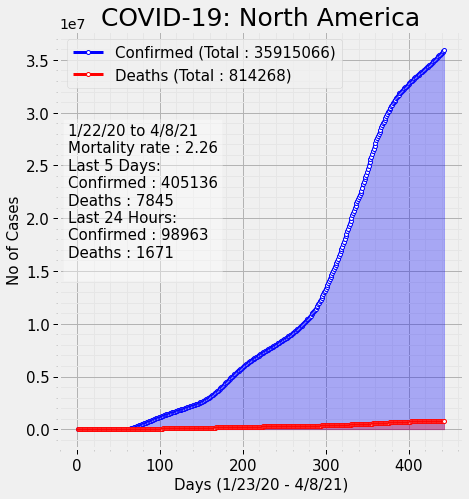

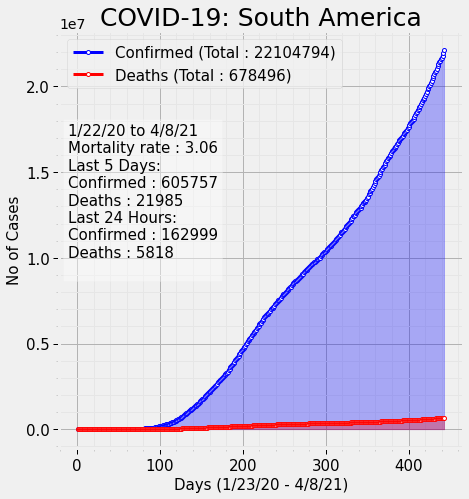

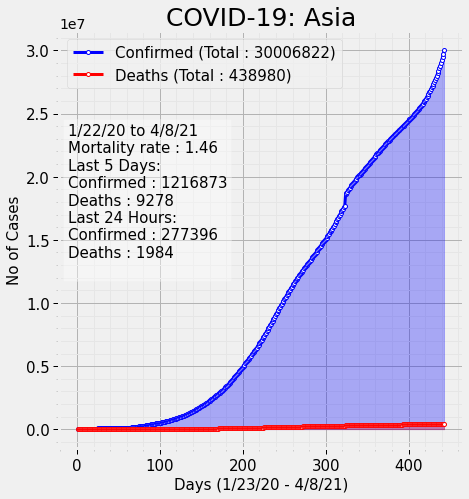

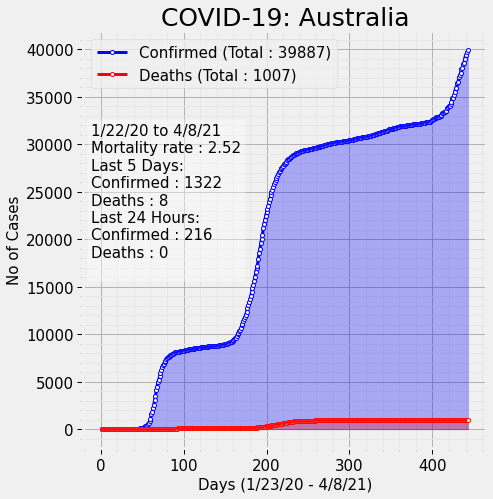

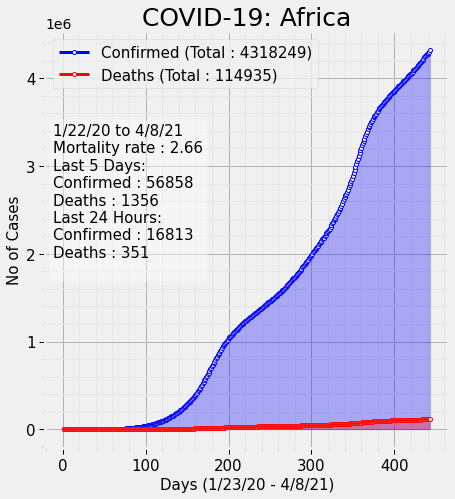

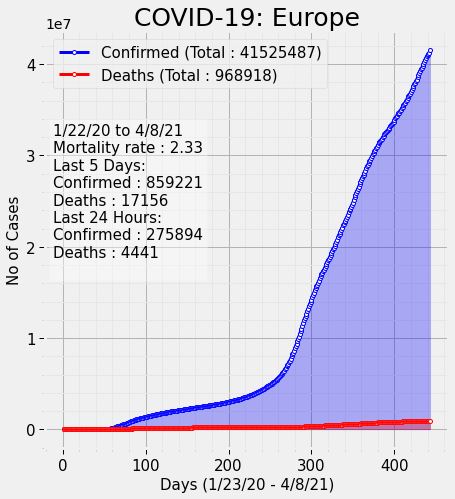

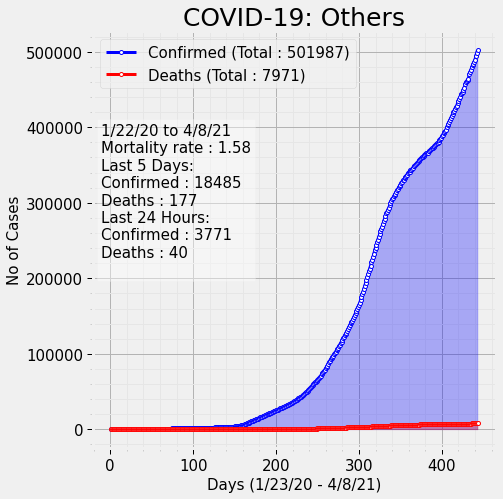

In [50]:
#Nhập code ở đây:
new_confirmed = pd.concat([new_confirmed_df.iloc[:,0:4],new_confirmed_df.iloc[:,-1],new_confirmed_df.iloc[:,4:-1]],axis = 1)
new_deaths = pd.concat([new_deaths_df.iloc[:,0:4],new_deaths_df.iloc[:,-1],new_deaths_df.iloc[:,4:-1]],axis = 1)
for key in continents:
    visualize_covid_cases_5(new_confirmed, new_deaths, continents[key])


**11.2**

    Sửa đổi hàm "plot_params" và "visual_covid_case" thành:
    - Hiển thị kết quả của 7 ngày gần nhất thay vì 5 ngày.
    - Thêm "Recoveries line" vào biểu đồ chính.
    - Thêm số "Total Recoveries" vào bảng nhỏ
    - Thêm "Recoveries" được điền trong 7 ngày và 24 giờ qua vào menu thông tin.

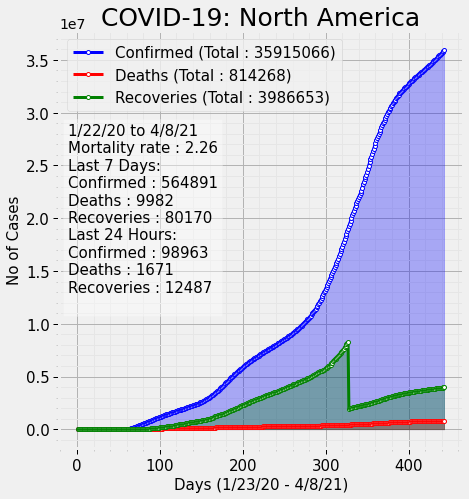

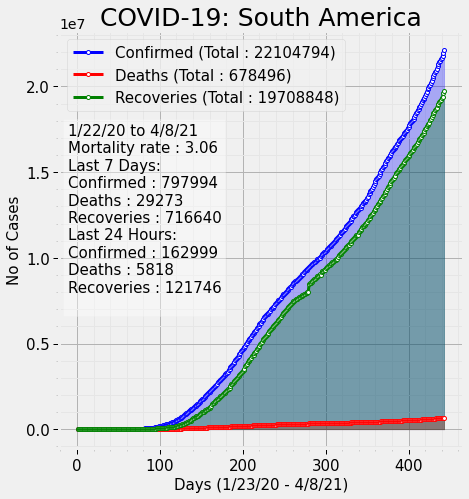

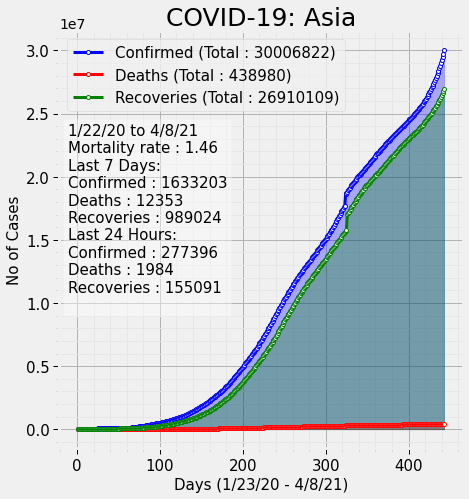

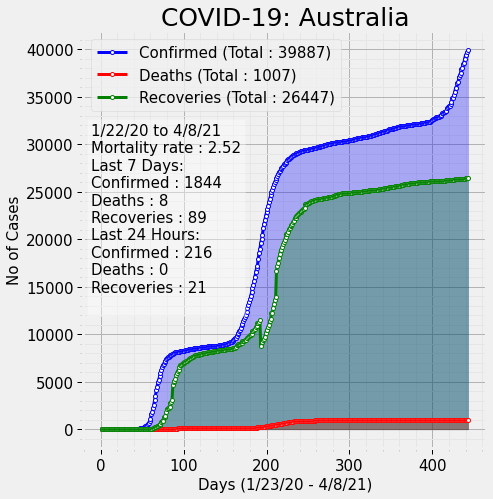

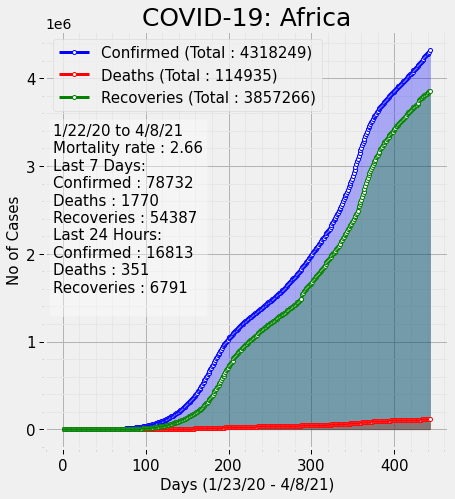

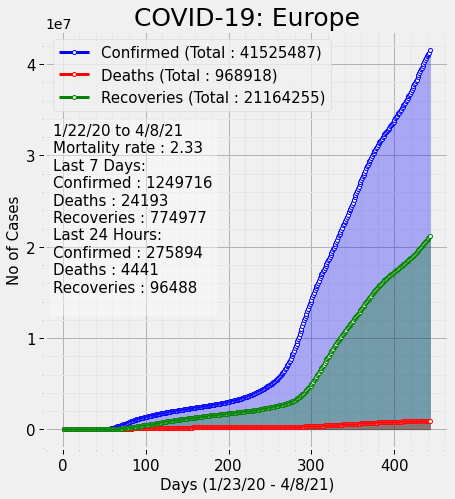

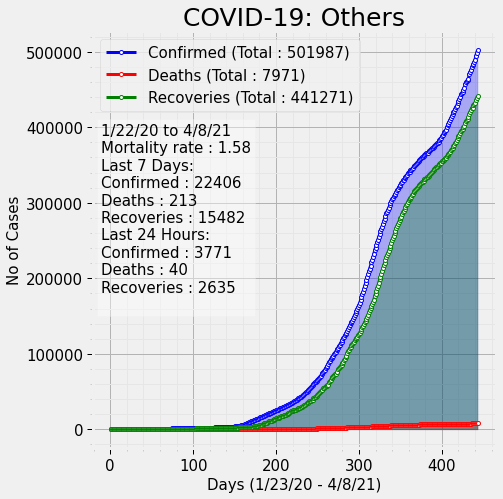

In [54]:
#Nhập code ở đây:
new_confirmed = pd.concat([new_confirmed_df.iloc[:,0:4],new_confirmed_df.iloc[:,-1],new_confirmed_df.iloc[:,4:-1]],axis = 1)
new_deaths = pd.concat([new_deaths_df.iloc[:,0:4],new_deaths_df.iloc[:,-1],new_deaths_df.iloc[:,4:-1]],axis = 1)
new_recoveries = pd.concat([new_recoveries_df.iloc[:,0:4],new_recoveries_df.iloc[:,-1],new_recoveries_df.iloc[:,4:-1]],axis = 1)

for key in continents:
    visualize_covid_cases_7(new_confirmed, new_deaths, new_recoveries, continents[key])

## Bài toán 12
    Trực quan hóa ma trận hiệp phương sai cho continents_df.

<AxesSubplot:>

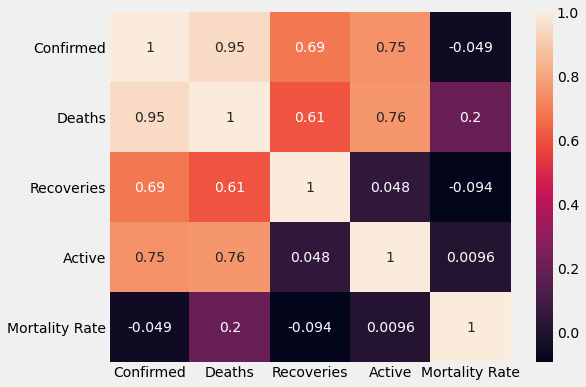

In [59]:
#Nhập code ở đây:
countries_df_groupby_continent
f, ax = plt.subplots(figsize=(8, 6))
corr = countries_df_groupby_continent.corr()
sns.heatmap(corr, annot=True)

## Bài toán 13
    Xây dựng biểu đồ tròn để so sánh tỷ lệ số ca mắc được xác nhận, số ca tử vong, số ca phục hồi và số ca vẫn còn mắc của 7 châu lục.
    Mỗi trường (confirm, deaths, ...) nên được trình bày trong các biểu đồ tròn khác nhau.
    Bạn không được sử dụng đoạn code lặp lại ở đây, hãy thử sử dụng vòng lặp for.
    Mỗi châu lục nên được trình bày bằng các màu sắc khác nhau.

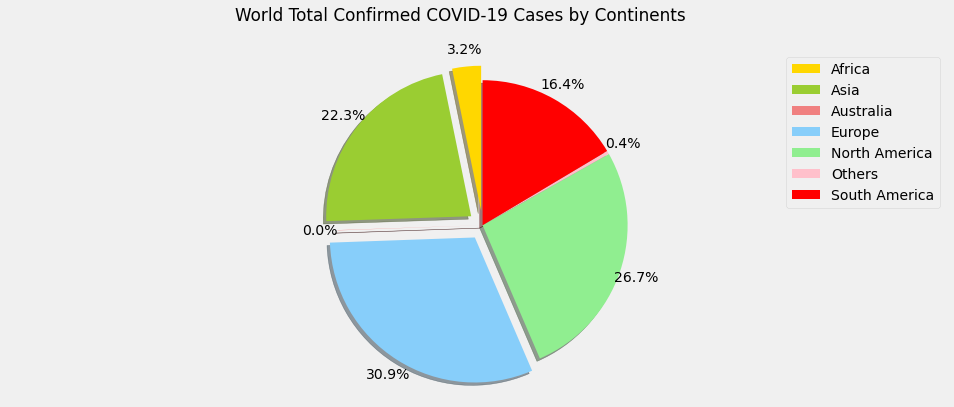

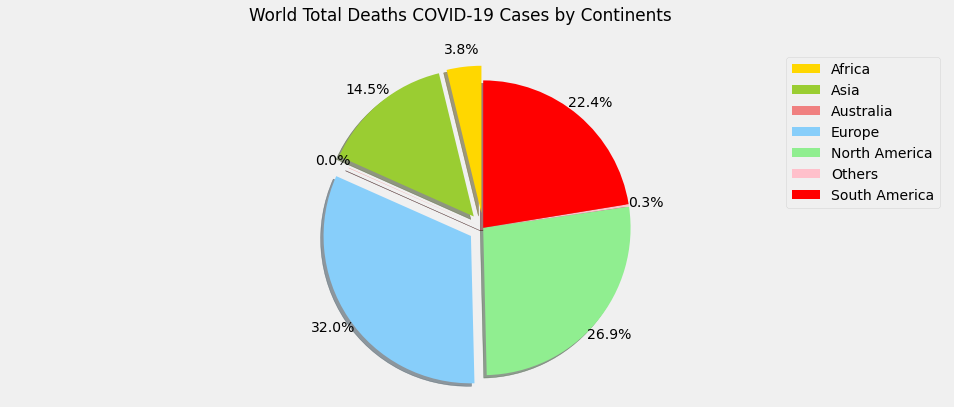

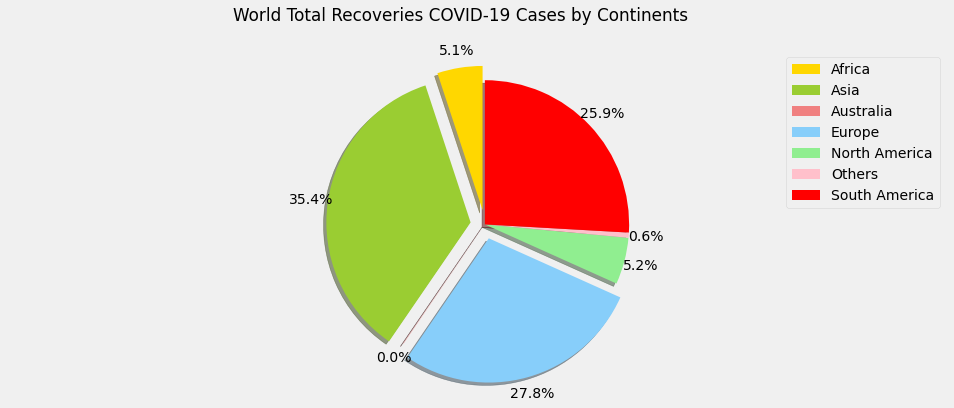

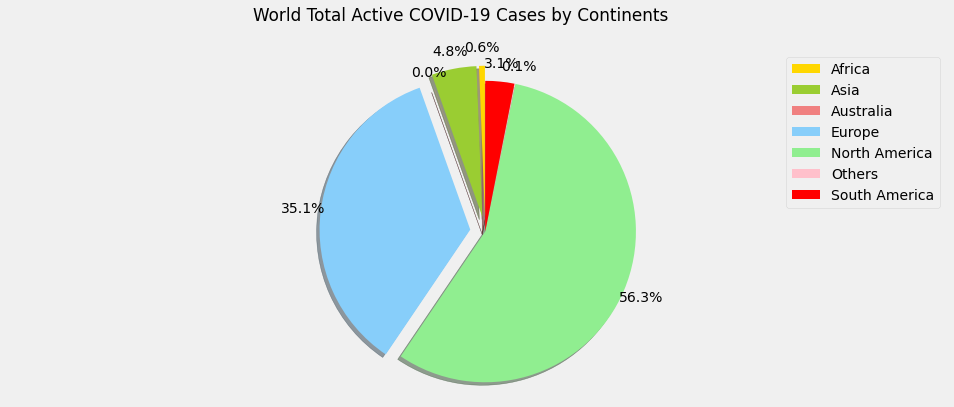

In [73]:
#Nhập code ở đây:
columns = countries_df_groupby_continent.columns[0:4]
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'red']
explode_list = [0.1, 0.1, 0, 0.1, 0, 0, 0]
for i in range(len(columns)):
    fig, ax = plt.subplots(figsize=(15, 6))
    ax.pie(countries_df_groupby_continent[columns[i]], 
           autopct='%1.1f%%', 
           startangle=90,    
           shadow=True,       
           labels=None,         
           pctdistance=1.12,     
           colors=colors_list,  
           explode=explode_list
          )
    title = 'World Total ' + columns[i] + ' COVID-19 Cases by Continents'
    fig.suptitle(title)
    # Tỷ lệ khung hình bằng nhau để không bị chồng lên nhau
    ax.axis('equal')
    plt.legend(countries_df_groupby_continent.index, loc="best")

plt.show()

# 7. Phân tích theo quốc gia

## Bài toán 14
    Xây dựng bản đồ folium để hiển thị số ca được xác nhận, số ca tử vong, số ca phục hồi và tỷ lệ tử vong của mỗi quốc gia dựa trên vị trí của các quốc gia. Bán kính của vòng tròn tỷ lệ thuận với số ca được xác nhận.


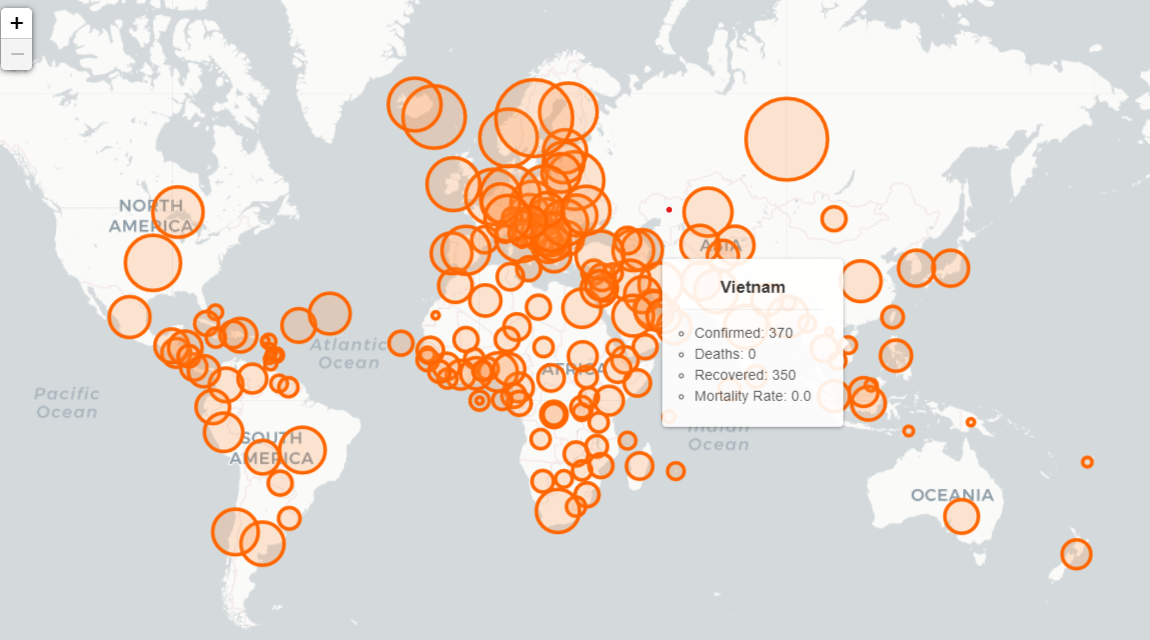

In [74]:
#Nhập code ở đây:
location_mean_df = confirmed_df.groupby(['Country/Region']).mean()
countries_location_groupby_country_df = pd.concat([countries_df_groupby_country.iloc[:,:], location_mean_df.iloc[:,0:2]], axis = 1)

m = folium.Map(tiles='CartoDB positron', zoom_start=12)
for i in range(countries_location_groupby_country_df.shape[0]):
    Confirm = countries_location_groupby_country_df.iloc[i,1]
    Deaths = countries_location_groupby_country_df.iloc[i,2]
    Recoverd = countries_location_groupby_country_df.iloc[i,3]
    Mortality_Rate = countries_location_groupby_country_df.iloc[i,5]
    
    html="""<div style=\"height:150px; width: 150px; margin:0 auto;\">
                <p align=\"center\"><b>""" + str(countries_location_groupby_country_df.index[i]) + """</b></p>
                <hr  width=\"100px\" size=\"1px\" align=\"center\"
                <ul>
                  <li>Confirm: """ + str(Confirm) + """</li>
                  <li>Deaths: """ + str(Deaths) + """</li>
                  <li>Recoverd: """ + str(Recoverd) + """</li>
                  <li>Mortality Rate: """ + str(Mortality_Rate) + """</li>
                </ul>
    </div>"""

    folium.Circle(
        location= [countries_location_groupby_country_df.iloc[i,6], countries_location_groupby_country_df.iloc[i,7]],
        radius= float(Confirm),
        color='#FE9A2E',
        fill=True,
        popup = html,
        fill_color='#FE9A2E'
    ).add_to(m)

m

## Bài toán 15
Xây dựng bản đồ px [(plotly.express)](https://plotly.com/python/plotly-express/) để hiển thị số ca còn mắc Covid của mỗi quốc gia trong log(10) dựa trên tên các quốc gia bằng cách sử dụng màu "quang phổ".

In [100]:
#Nhập code ở đây:
#dữ liệu chính
countries_map_df = countries_location_groupby_country_df.reset_index()

#cho các mã iso quốc gia vào dict 
countries_all_dict_iso_code = cm.map_countries()

#tạo 1 list cho countries_map_df
countries_iso_code = []

#chuyển đổi tên quốc gia sang mã iso
for i in range(countries_map_df.shape[0]):
    key = countries_map_df.iloc[i,0]
    try:
        if key == 'Burma':
            countries_iso_code.append("BUR")
        elif key == 'Diamond Princess':
            countries_iso_code.append("NAN")
        elif key == 'Holy See':
            countries_iso_code.append("VAT")
        elif key == 'Kosovo':
            countries_iso_code.append("UNK")
        elif key == 'MS Zaandam':
            countries_iso_code.append("NAN")
        elif key == 'Timor-Leste':
            countries_iso_code.append("TLS")
        elif key == 'West Bank and Gaza':
            countries_iso_code.append("NAN")
        elif key == 'USA':
            countries_iso_code.append("USA")
        else:
            countries_iso_code.append(countries_all_dict_iso_code[key]["alpha_3"])
    except:
        print("errot: " + key)

#chuyển đổi list countries_iso_code thành dataframe 
countries_iso_code_df = pd.DataFrame(countries_iso_code, columns =['iso_alpha'])

#kết hợp countries_iso_code_df với countries_map_df
countries_map_df = pd.concat([countries_map_df.iloc[:,:], countries_iso_code_df.iloc[:,0]],axis = 1)

#tính log cơ số 10 cho cột active
color_df = np.log10(countries_map_df['Active'])

#đổi tên log cơ số 10 của cột active thành tên color
color_df = color_df.to_frame('color')

#kết hợp color_df với countries_map_df
countries_map_df = pd.concat([countries_map_df, color_df], axis = 1)

# vẽ bản đồ
fig = px.choropleth(countries_map_df, locations="iso_alpha", color="color",hover_data = ["Active","Country/Region"], labels={'color':'Active Cases(log scale)'},hover_name="Country/Region", title="Active Cases Heat Map (Log Scale)",color_continuous_scale='Spectral')
fig.update_geos(fitbounds="locations", visible=False)
fig.show()


errot: Winter Olympics 2022
errot: Korea, North
errot: Summer Olympics 2020


C:\Users\Hades\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning:

divide by zero encountered in log10

C:\Users\Hades\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning:

invalid value encountered in log10



## Bài toán 16
    Lọc 10 quốc gia hàng đầu dựa trên số ca được xác nhận.

In [78]:
#Nhập code ở đây:
countries_location_groupby_country_df_top10 = countries_location_groupby_country_df.sort_values(by=['Confirmed'], inplace=False, ascending=False).iloc[0:10,:]
countries_location_groupby_country_df_top10

,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Lat,Long
Country/Region,,,,,,,,
USA,North America,31122720,556352,0,30566368,1.79,40.000000,-100.000000
Brazil,South America,13297270,345544,11668734,1282992,2.60,-14.235000,-51.925300
India,Asia,13060542,167642,11913292,979608,1.28,20.593684,78.962880
France,Europe,5000155,98196,312540,4589419,1.96,6.425300,-9.839634
Russia,Europe,4563026,100158,4190701,272167,2.19,61.524010,105.318756
United Kingdom,Europe,4384952,153326,13435,4218191,3.50,22.424560,-42.022004
Italy,Europe,3717602,112861,3060411,544330,3.04,41.871940,12.567380
Turkey,Asia,3689866,33201,3232892,423773,0.90,38.963700,35.243300
Spain,Europe,3336637,76179,150376,3110082,2.28,40.463667,-3.749220


## Bài toán 17
    Trực qua hóa 10 quốc gia được xác nhận hàng đầu với số ca vẫn còn mắc Covid, phục hồi và tử vong bằng cách sử dụng biểu đồ thanh xếp chồng lên nhau.

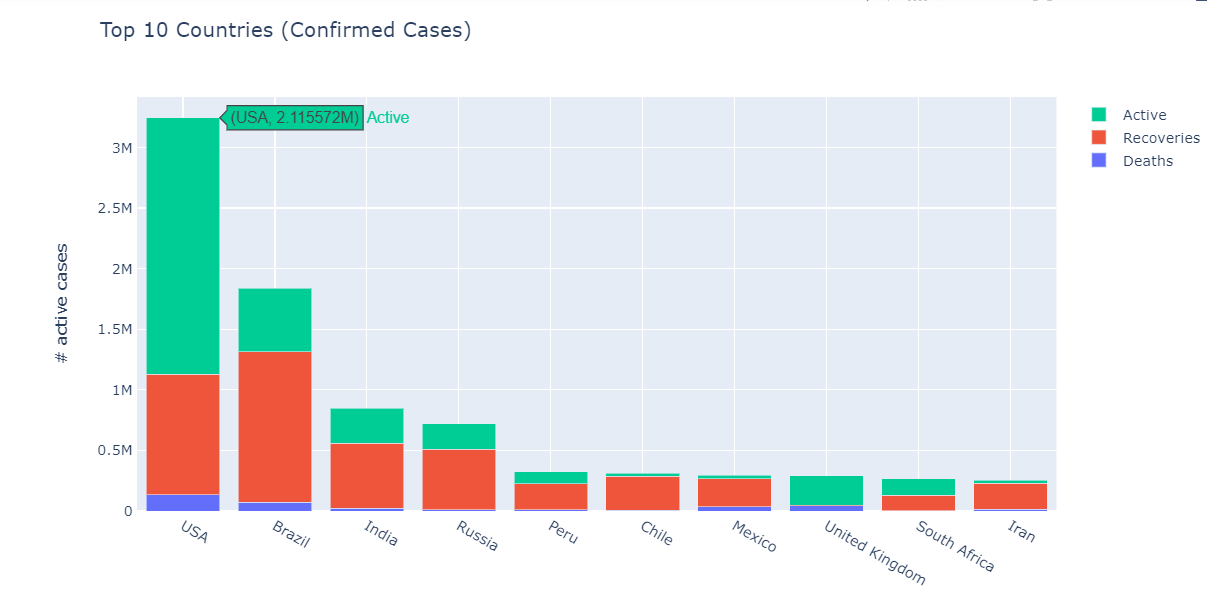

In [99]:
#Nhập code ở đây:
tips = countries_location_groupby_country_df_top10.reset_index()

#vẽ biểu đồ xếp chồng cho top 10 Countries
px.histogram(tips, x="Country/Region", 
             hover_data = ["variable"] , 
             y = ["Deaths", "Recoveries", "Active"], 
             title = "Top 10 Countries (Confirmed Cased)", 
             labels={"variable": ""})


# 8. Phân tích nâng cao
 

## Bài toán 18
    Dựa trên dữ liệu trực quan toàn cầu, đại dịch COVID 2019 trên thế giới đã đạt đến đỉnh điểm chưa?
    Bạn hãy trả lời ở đây:


<b>Trả lời :</b> Dịch covid-19 vẫn chưa qua đỉnh điểm bởi vì biểu đồ thể hiện số trường hợp nhiễm bệnh trên toàn thế giới chưa thấy xu hướng giảm.

## Bài toán 19
Dựa trên trực quan hóa dữ liệu của châu lục:

    19.1 Châu lục nào có tỷ lệ tử vong cao nhất theo các ca mắc của châu lục?

    19.2 Châu lục nào có tỷ lệ lây lan COVID 2019 cao nhất theo số ca mắc của châu lục?
    
    19.3 Châu lục nào có tỷ lệ phục hồi cao nhất trong tập dữ liệu của các châu lục?

(Lưu ý: Tỷ lệ lan truyền COVID 2019 = Số lượng các ca mới được xác nhận trong 10 ngày qua / số ca mắc trước đó).
Bạn hãy trả lời ở đây:

In [98]:
#19.1

#tính tỉ lệ tử vong của các châu lục
countries_df_groupby_continent["death_rate_over_active_cases"] = np.round(100 * countries_df_groupby_continent["Deaths"] / countries_df_groupby_continent["Active"],2)
countries_df_groupby_continent.sort_values(by=['death_rate_over_active_cases'], inplace=True, ascending=False)
countries_df_groupby_continent


,Confirmed,Deaths,Recoveries,Active,Mortality Rate,death_rate_over_active_cases
continent,,,,,,
South America,22104794,678496,19708848,1717450,3.07,39.51
Africa,4318249,114935,3857266,346048,2.66,33.21
Asia,30006822,438980,26910109,2657733,1.46,16.52
Others,501987,7971,441271,52745,1.59,15.11
Australia,39887,1007,26447,12433,2.52,8.10
Europe,41525487,968918,21164255,19392314,2.33,5.00
North America,35915066,814268,3986653,31114145,2.27,2.62


## South America là lục địa có tỉ lệ tử vong cao nhất: 39.51%

In [91]:
#19.3

#tính tỉ lệ hồi phục của các châu lục
countries_df_groupby_continent['recoveries_rate'] = np.round(100 * countries_df_groupby_continent.iloc[:,2] / countries_df_groupby_continent.iloc[:,0],2)
countries_df_groupby_continent.sort_values(by=['recoveries_rate'], inplace=True, ascending=False)
countries_df_groupby_continent

,Confirmed,Deaths,Recoveries,Active,Mortality Rate,death_rate_over_active_cases,recoveries_rate
continent,,,,,,,
Asia,30006822,438980,26910109,2657733,1.46,16.52,89.68
Africa,4318249,114935,3857266,346048,2.66,33.21,89.32
South America,22104794,678496,19708848,1717450,3.07,39.51,89.16
Others,501987,7971,441271,52745,1.59,15.11,87.90
Australia,39887,1007,26447,12433,2.52,8.10,66.30
Europe,41525487,968918,21164255,19392314,2.33,5.00,50.97
North America,35915066,814268,3986653,31114145,2.27,2.62,11.10


## Asia là châu lục có tỉ lệ hồi phục cao nhất: 89.68%

## Bài toán 20

Dựa trên trực quan hóa dữ liệu theo quốc gia:

    20.1 Quốc gia nào có tỷ lệ tử vong cao nhất theo tập dữ liệu của các quốc gia?

    20.2 Quốc gia nào có tỷ lệ lây lan COVID 2019 cao nhất theo với tập dữ liệu của các quốc gia?
     
    20.3 Quốc gia nào có tỷ lệ hồi phục cao nhất theo tập dữ liệu của các quốc gia?
Bạn hãy trả lời ở đây:
<p><b>Trả lời:</b></p>

In [87]:
#20.1

# sắp xếp theo tỉ lệ tử vong của các quốc qia
countries_df_groupby_country.sort_values(by=["Mortality Rate"], inplace=True, ascending=False)
countries_df_groupby_country

,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate,recoveries_rate
Country/Region,,,,,,,
MS Zaandam,Others,9,2,7,0,22.22,77.78
Yemen,Asia,5133,1004,1946,2183,19.56,37.91
Peru,South America,1617864,149241,1527112,-58489,9.22,94.39
Mexico,North America,2267019,206146,1802033,258840,9.09,79.49
Syria,Asia,19883,1352,13666,4865,6.80,68.73
...,...,...,...,...,...,...,...
Palau,Australia,0,0,0,0,NaN,NaN
Summer Olympics 2020,Others,0,0,0,0,NaN,NaN
Tonga,Australia,0,0,0,0,NaN,NaN


In [86]:
#20.3

#tính tỉ lệ hồi phục của các quốc gia
countries_df_groupby_country['recoveries_rate'] = np.round(100 * countries_df_groupby_country.iloc[:,3] / countries_df_groupby_country.iloc[:,1],2)
countries_df_groupby_country.sort_values(by=['recoveries_rate'], inplace=True, ascending=False)
countries_df_groupby_country

,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate,recoveries_rate
Country/Region,,,,,,,
Micronesia,Australia,1,0,1,0,0.00,100.00
Saint Kitts and Nevis,North America,44,0,44,0,0.00,100.00
Marshall Islands,Australia,4,0,4,0,0.00,100.00
Singapore,Asia,60575,30,60284,261,0.05,99.52
Uganda,Africa,41062,337,40685,40,0.82,99.08
...,...,...,...,...,...,...,...
Palau,Australia,0,0,0,0,NaN,NaN
Summer Olympics 2020,Others,0,0,0,0,NaN,NaN
Tonga,Australia,0,0,0,0,NaN,NaN


## Bài toán 21
**USA dataset**

In [ ]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

Dựa trên USA dataset:

    21.1 Tiểu bang nào có tỷ lệ tử vong cao nhất theo tập dữ liệu của các tiểu bang?

    21.2 Tiểu bang nào có tỷ lệ lây lan COVID 2019 cao nhất theo tập dữ liệu của các tiểu bang?
    
    21.3 Tiểu bang nào có tỷ lệ hồi phục cao nhất theo tập dữ liệu của các tiểu bang?

In [ ]:
#Nhập code ở đây:

## Bài toán 22
Xây dựng mô hình hồi quy (hoặc nhiều hơn 1 mô hình) để dự đoán số ca mắc Covid được xác nhận mới ở 10 bang hàng đầu có số ca mắc được xác nhận cao nhất ở Hoa Kỳ.

In [ ]:
#Nhập code ở đây: